# Maximum sampling frequency study
In this notebook, we study the maximum sampling frequency supported by each solution.

## Import necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

from visualize import *
import seaborn as sns
import matplotlib.pyplot as plt

## PowerAPI study

### Load experiment results

In [2]:
experiments_path = [
    'powerapi-frequency-change-gemini-1.lyon.grid5000.fr-2022-04-04-22_48_34',
    'powerapi-frequency-change-gemini-1.lyon.grid5000.fr-2022-04-04-23_07_31',
    'powerapi-frequency-change-gemini-1.lyon.grid5000.fr-2022-04-04-23_26_30',
    'powerapi-frequency-change-gemini-1.lyon.grid5000.fr-2022-04-04-23_45_31',
    'powerapi-frequency-change-gemini-1.lyon.grid5000.fr-2022-04-05-00_04_31',
    'powerapi-frequency-change-gemini-1.lyon.grid5000.fr-2022-04-05-00_23_30',
    'powerapi-frequency-change-gemini-1.lyon.grid5000.fr-2022-04-05-00_42_33',
    'powerapi-frequency-change-gemini-1.lyon.grid5000.fr-2022-04-05-01_01_32',
    'powerapi-frequency-change-gemini-1.lyon.grid5000.fr-2022-04-05-01_20_33',
    'powerapi-frequency-change-gemini-1.lyon.grid5000.fr-2022-04-05-01_39_38'
]


experiments_powerapi = []

for experiment_path in experiments_path:
    experiments_powerapi.append(parse_experiment("../results/%s" % experiment_path))

### Prepare data for plotting

In [3]:
# Result dataframe
result_df_plots = pd.DataFrame(columns=['timestamp', 'benchmark', 'plot_name', 'value', 'experiment'])

for experiment in experiments_powerapi[0]['experiments']:
    
    benchmarks_powerapi = convert_exp_into_benchmark_dataframes(experiments_powerapi, experiment['name'],'powerapi', 60)

    for benchmark in benchmarks_powerapi:
        ## Get a list of powerapi dataframes
        experiments_powerapi_dataframes = list(map(lambda el: el['dataframe'], benchmarks_powerapi[benchmark]['powerapi']))
        ## Calculate a median value dataframe
        powerapi_median_values_df = calculate_median_values(experiments_powerapi_dataframes, ['timestamp', 'target', 'scope', 'socket'], 'power')
        
        ## Create a plottable dataframe for power api
        result_df_plot_powerapi = create_plottable_df_for_powerapi(powerapi_median_values_df, str(benchmark), targets=['rapl', 'process'])

        result_df_plot_powerapi['experiment'] = experiment['name']

        # Add plottable dataframe to result dataframe
        result_df_plots = pd.concat([result_df_plots,result_df_plot_powerapi], ignore_index=True)
    
result_df_plots

,timestamp,benchmark,plot_name,value,experiment
0,0 days 00:00:00,EP NAS Benchmark,powerapi_rapl_cpu,140.975311,powerapi-1000
1,0 days 00:00:01,EP NAS Benchmark,powerapi_rapl_cpu,140.991394,powerapi-1000
2,0 days 00:00:02,EP NAS Benchmark,powerapi_rapl_cpu,140.962189,powerapi-1000
3,0 days 00:00:03,EP NAS Benchmark,powerapi_rapl_cpu,141.057404,powerapi-1000
4,0 days 00:00:04,EP NAS Benchmark,powerapi_rapl_cpu,141.115234,powerapi-1000
...,...,...,...,...,...
4288,0 days 00:01:19,EP NAS Benchmark,powerapi_process_1_total,172.624244,powerapi-50
4289,0 days 00:01:20,EP NAS Benchmark,powerapi_process_1_total,172.596538,powerapi-50
4290,0 days 00:01:21,EP NAS Benchmark,powerapi_process_1_total,172.660543,powerapi-50
4291,0 days 00:01:22,EP NAS Benchmark,powerapi_process_1_total,172.597805,powerapi-50


### Plot power profiles

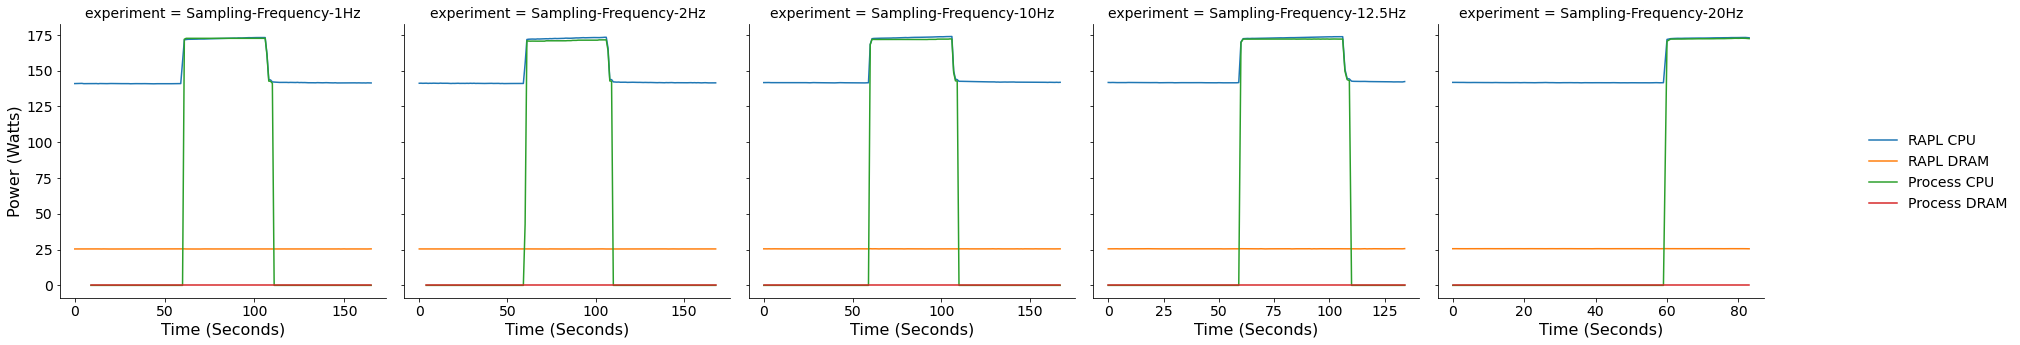

In [4]:
# Change the experiment name to reflect the sampling frequency
result_df_plots.loc[result_df_plots['experiment'] == 'powerapi-1000','experiment'] = 'Sampling-Frequency-1Hz'
result_df_plots.loc[result_df_plots['experiment'] == 'powerapi-500','experiment'] = 'Sampling-Frequency-2Hz'
result_df_plots.loc[result_df_plots['experiment'] == 'powerapi-100','experiment'] = 'Sampling-Frequency-10Hz'
result_df_plots.loc[result_df_plots['experiment'] == 'powerapi-80','experiment'] = 'Sampling-Frequency-12.5Hz'
result_df_plots.loc[result_df_plots['experiment'] == 'powerapi-50','experiment'] = 'Sampling-Frequency-20Hz'

result_df_plots['timestamp_sec'] = result_df_plots['timestamp'].dt.total_seconds()
plt.rcParams.update({'font.size': 14})
grid = sns.relplot(
    data=result_df_plots,
    x="timestamp_sec", y="value",
    hue="plot_name", col="experiment",
    kind="line",
    facet_kws={'sharex': False, 'sharey': True},
    hue_order=['powerapi_rapl_cpu', 'powerapi_rapl_dram', 'powerapi_process_1_cpu', 'powerapi_process_1_dram']
)
grid.set_xlabels('Time (Seconds)', fontsize="16")
grid.set_ylabels('Power (Watts)', fontsize="16")
# Change legend texts
grid.legend.set_title(None)
for t, l in zip(grid.legend.texts, ['RAPL CPU', 'RAPL DRAM', 'Process CPU', 'Process DRAM']):
    t.set_text(l)

## Scaphandre study

### Load experiment results

In [5]:
experiments_path = [
    'scaphandre-frequency-change-gemini-1.lyon.grid5000.fr-2022-04-04-20_21_39',
    'scaphandre-frequency-change-gemini-1.lyon.grid5000.fr-2022-04-04-20_35_41',
    'scaphandre-frequency-change-gemini-1.lyon.grid5000.fr-2022-04-04-20_49_45',
    'scaphandre-frequency-change-gemini-1.lyon.grid5000.fr-2022-04-04-21_03_52',
    'scaphandre-frequency-change-gemini-1.lyon.grid5000.fr-2022-04-04-21_17_57',
    'scaphandre-frequency-change-gemini-1.lyon.grid5000.fr-2022-04-04-21_32_03',
    'scaphandre-frequency-change-gemini-1.lyon.grid5000.fr-2022-04-04-21_46_09',
    'scaphandre-frequency-change-gemini-1.lyon.grid5000.fr-2022-04-04-22_00_18',
    'scaphandre-frequency-change-gemini-1.lyon.grid5000.fr-2022-04-04-22_14_28',
    'scaphandre-frequency-change-gemini-1.lyon.grid5000.fr-2022-04-04-22_29_05'
]

experiments_scaphandre = []

for experiment_path in experiments_path:
    experiments_scaphandre.append(parse_experiment("../results/%s" % experiment_path))

# Additional processing is required for Scaphandre dataframes
# Scaphandre by component result dataframes will be joined into a single dataframe
process_scaphandre_dataframes_process(experiments_scaphandre)

### Prepare data for plotting

In [6]:
# Result dataframe
result_df_plots_scaph = pd.DataFrame(columns=['timestamp', 'benchmark', 'plot_name', 'value', 'experiment'])

for experiment in experiments_scaphandre[0]['experiments']:
    
    benchmarks_scaphandre = convert_exp_into_benchmark_dataframes(experiments_scaphandre, experiment['name'], 'scaphandre', 60)
    
    if benchmarks_scaphandre is not None:
        for benchmark in benchmarks_scaphandre:
            ## Get a list of scaphandre dataframes
            experiments_scaphandre_dataframes = list(map(lambda el: el['dataframe'], benchmarks_scaphandre[benchmark]['scaphandre']))
            ## Calculate a median value dataframe
            scaphandre_median_values_df = calculate_median_values(experiments_scaphandre_dataframes, ['timestamp', 'target'], 'value', timestamp_floor='5s')
            ## Create a plottable dataframe for power api
            result_df_plot_scaphandre = create_plottable_df_for_scaphandre(scaphandre_median_values_df, str(benchmark))
        
            result_df_plot_scaphandre['experiment'] = experiment['name']

            # Add plottable dataframe to result dataframe
            result_df_plots_scaph = pd.concat([result_df_plots_scaph,result_df_plot_scaphandre], ignore_index=True)
    
result_df_plots_scaph

,timestamp,benchmark,plot_name,value,experiment
0,0 days 00:00:15,EP NAS Benchmark,scaphandre_host,141.187034,scaphandre-10
1,0 days 00:00:25,EP NAS Benchmark,scaphandre_host,141.188832,scaphandre-10
2,0 days 00:00:35,EP NAS Benchmark,scaphandre_host,141.210873,scaphandre-10
3,0 days 00:00:45,EP NAS Benchmark,scaphandre_host,141.209338,scaphandre-10
4,0 days 00:00:55,EP NAS Benchmark,scaphandre_host,141.148625,scaphandre-10
...,...,...,...,...,...
323,0 days 00:02:25,EP NAS Benchmark,scaphandre_process_1_cpu,0.000000,scaphandre-2
324,0 days 00:02:30,EP NAS Benchmark,scaphandre_process_1_cpu,0.000000,scaphandre-2
325,0 days 00:02:35,EP NAS Benchmark,scaphandre_process_1_cpu,0.000000,scaphandre-2
326,0 days 00:02:40,EP NAS Benchmark,scaphandre_process_1_cpu,0.000000,scaphandre-2


### Plot power profiles

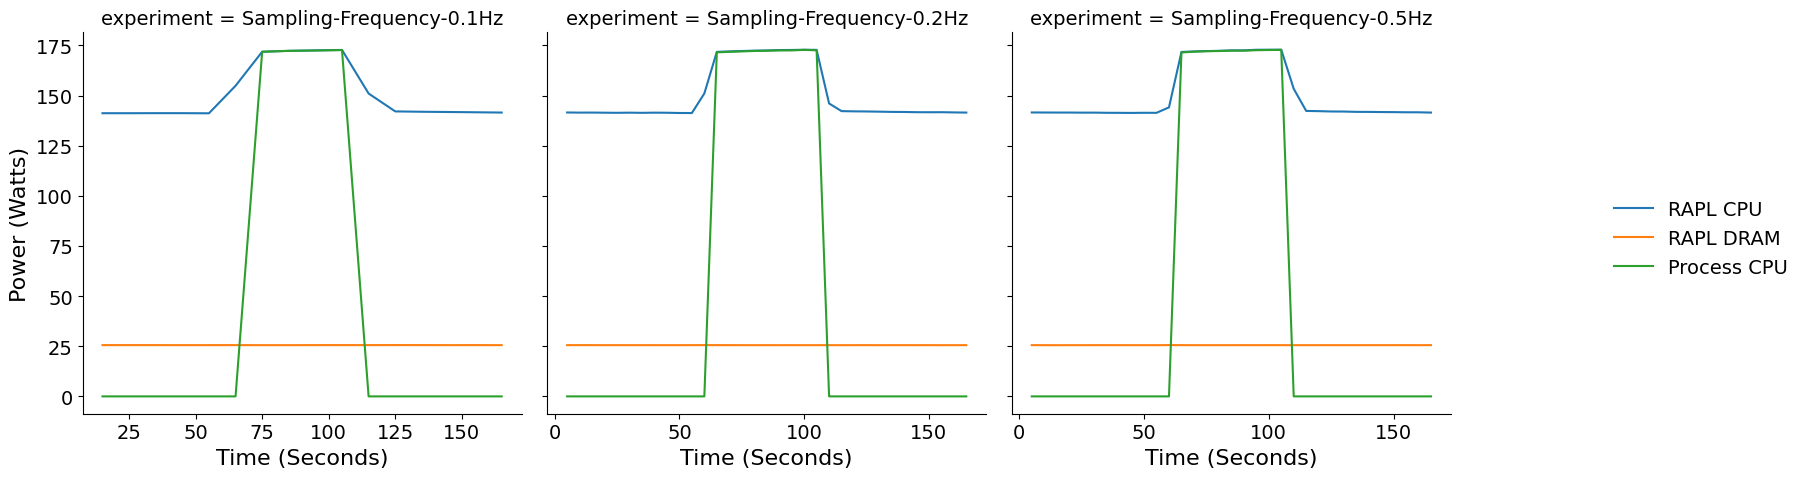

In [7]:
# Change the experiment name to reflect the sampling frequency
result_df_plots_scaph.loc[result_df_plots_scaph['experiment'] == 'scaphandre-10','experiment'] = 'Sampling-Frequency-0.1Hz'
result_df_plots_scaph.loc[result_df_plots_scaph['experiment'] == 'scaphandre-5','experiment'] = 'Sampling-Frequency-0.2Hz'
result_df_plots_scaph.loc[result_df_plots_scaph['experiment'] == 'scaphandre-2','experiment'] = 'Sampling-Frequency-0.5Hz'
result_df_plots_scaph.loc[result_df_plots_scaph['experiment'] == 'scaphandre-1','experiment'] = 'Sampling-Frequency-1Hz'

result_df_plots_scaph['timestamp_sec'] = result_df_plots_scaph['timestamp'].dt.total_seconds()
plt.rcParams.update({'font.size': 14})
grid = sns.relplot(
    data=result_df_plots_scaph,
    x="timestamp_sec", y="value",
    hue="plot_name", col="experiment",
    kind="line",
    facet_kws={'sharex': False, 'sharey': True},
    hue_order=['scaphandre_host', 'scaphandre_dram', 'scaphandre_process_1_cpu']
)
grid.set_xlabels('Time (Seconds)', fontsize="16")
grid.set_ylabels('Power (Watts)', fontsize="16")
# Change legend texts
grid.legend.set_title(None)
for t, l in zip(grid.legend.texts, ['RAPL CPU', 'RAPL DRAM', 'Process CPU']):
    t.set_text(l)

## Energy Scope study

### Load experiment results

In [8]:
experiments_path = [
    'energy-scope-frequency-change-gemini-1.lyon.grid5000.fr-2022-04-04-17_22_20',
    'energy-scope-frequency-change-gemini-1.lyon.grid5000.fr-2022-04-04-17_40_18',
    'energy-scope-frequency-change-gemini-1.lyon.grid5000.fr-2022-04-04-17_58_38',
    'energy-scope-frequency-change-gemini-1.lyon.grid5000.fr-2022-04-04-18_16_58',
    'energy-scope-frequency-change-gemini-1.lyon.grid5000.fr-2022-04-04-18_35_17',
    'energy-scope-frequency-change-gemini-1.lyon.grid5000.fr-2022-04-04-18_53_27',
    'energy-scope-frequency-change-gemini-1.lyon.grid5000.fr-2022-04-04-19_11_39',
    'energy-scope-frequency-change-gemini-1.lyon.grid5000.fr-2022-04-04-19_30_00',
    'energy-scope-frequency-change-gemini-1.lyon.grid5000.fr-2022-04-04-19_48_21',
    'energy-scope-frequency-change-gemini-1.lyon.grid5000.fr-2022-04-04-20_06_42'
]


experiments_energy_scope = []

for experiment_path in experiments_path:
    experiments_energy_scope.append(parse_experiment("../results/%s" % experiment_path))

### Prepare data for plotting

In [9]:
# Result dataframe
result_df_plots_es = pd.DataFrame(columns=['timestamp', 'benchmark', 'plot_name', 'value', 'experiment'])

for experiment in experiments_energy_scope[0]['experiments']:
    
    benchmarks_powerapi = convert_exp_into_benchmark_dataframes(experiments_energy_scope, experiment['name'],'energyscope', 60)

    for benchmark in benchmarks_powerapi:
        ## Get a list of energy scope dataframes
        experiments_energy_scope_dataframes = list(map(lambda el: el['dataframe'], benchmarks_powerapi[benchmark]['energyscope']))
        ## Calculate a median value dataframe
        energy_scope_median_values_df_cpu = calculate_median_values(experiments_energy_scope_dataframes, ['timestamp'], 'data.data.ecpu(W)', timestamp_floor='500ms')
        energy_scope_median_values_df_dram = calculate_median_values(experiments_energy_scope_dataframes, ['timestamp'], 'data.data.edram(W)', timestamp_floor='500ms')
        energy_scope_median_values_df_total = calculate_median_values(experiments_energy_scope_dataframes, ['timestamp'], 'data.data.etotal(W)', timestamp_floor='500ms')
        
        ### Merging median values dataframes
        energy_scope_median_values_df = pd.merge(energy_scope_median_values_df_cpu, energy_scope_median_values_df_dram, on="timestamp")
        energy_scope_median_values_df = pd.merge(energy_scope_median_values_df_total, energy_scope_median_values_df, on="timestamp")

        ### Create a plottable dataframe for power api
        result_df_plot_energy_scope = create_plottable_df_for_energy_scope(energy_scope_median_values_df, str(benchmark))
        
        result_df_plot_energy_scope['experiment'] = experiment['name']

        # Add plottable dataframe to result dataframe
        result_df_plots_es = pd.concat([result_df_plots_es,result_df_plot_energy_scope], ignore_index=True)
    
result_df_plots_es

,timestamp,benchmark,plot_name,value,experiment
0,0 days 00:00:57,EP NAS Benchmark,energy_scope_cpu,142.0525,energyscope-500
1,0 days 00:00:57.500000,EP NAS Benchmark,energy_scope_cpu,142.0525,energyscope-500
2,0 days 00:00:58,EP NAS Benchmark,energy_scope_cpu,141.7155,energyscope-500
3,0 days 00:00:58.500000,EP NAS Benchmark,energy_scope_cpu,141.6625,energyscope-500
4,0 days 00:00:59,EP NAS Benchmark,energy_scope_cpu,141.5980,energyscope-500
...,...,...,...,...,...
1942,0 days 00:01:59.500000,EP NAS Benchmark,energy_scope_total,168.4320,energyscope-20
1943,0 days 00:02:00,EP NAS Benchmark,energy_scope_total,168.2600,energyscope-20
1944,0 days 00:02:00.500000,EP NAS Benchmark,energy_scope_total,168.5750,energyscope-20
1945,0 days 00:02:01,EP NAS Benchmark,energy_scope_total,168.3270,energyscope-20


### Plot power profiles

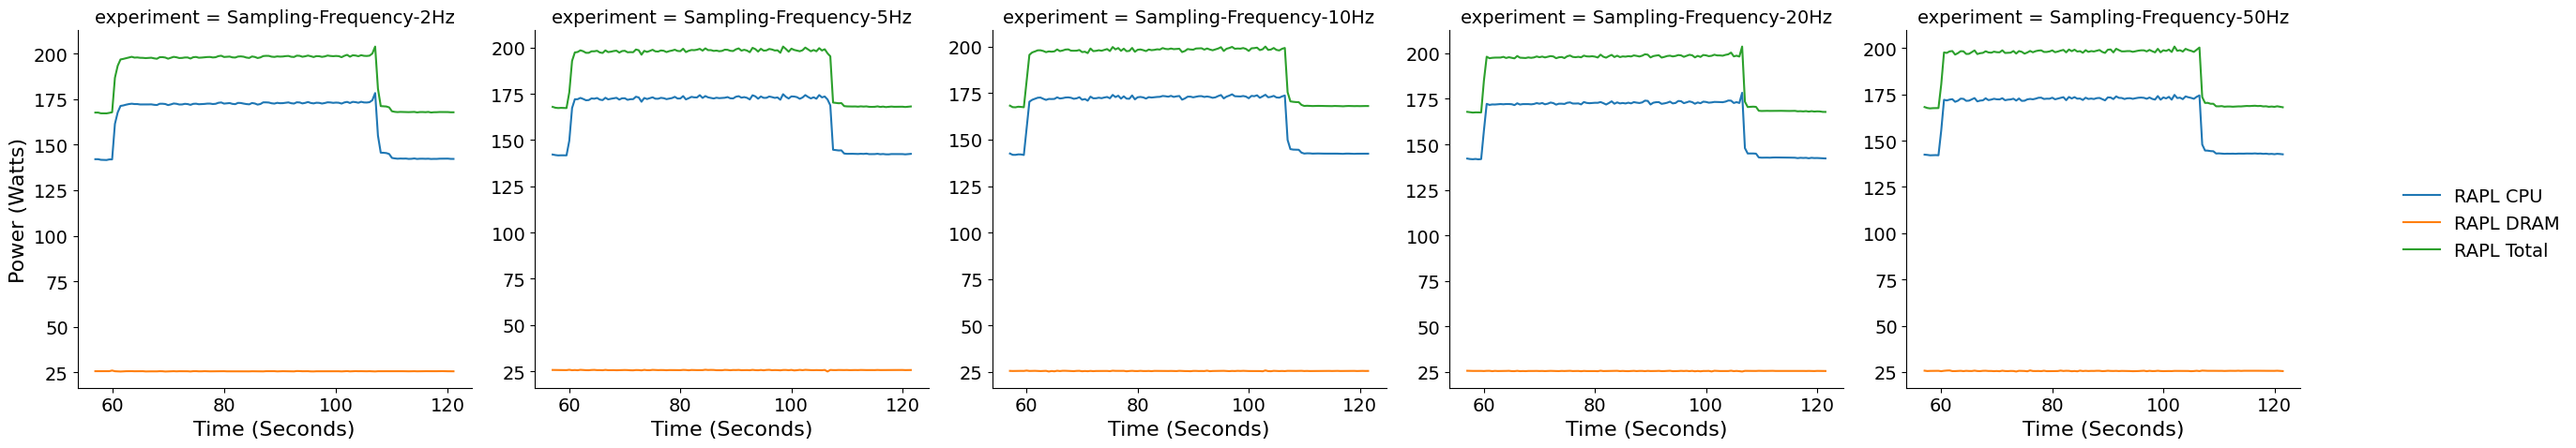

In [10]:
# Change the experiment name to reflect the sampling frequency
result_df_plots_es.loc[result_df_plots_es['experiment'] == 'energyscope-500','experiment'] = 'Sampling-Frequency-2Hz'
result_df_plots_es.loc[result_df_plots_es['experiment'] == 'energyscope-200','experiment'] = 'Sampling-Frequency-5Hz'
result_df_plots_es.loc[result_df_plots_es['experiment'] == 'energyscope-100','experiment'] = 'Sampling-Frequency-10Hz'
result_df_plots_es.loc[result_df_plots_es['experiment'] == 'energyscope-50','experiment'] = 'Sampling-Frequency-20Hz'
result_df_plots_es.loc[result_df_plots_es['experiment'] == 'energyscope-20','experiment'] = 'Sampling-Frequency-50Hz'

result_df_plots_es['timestamp_sec'] = result_df_plots_es['timestamp'].dt.total_seconds()
plt.rcParams.update({'font.size': 14})
grid = sns.relplot(
    data=result_df_plots_es,
    x="timestamp_sec", y="value",
    hue="plot_name", col="experiment",
    kind="line",
    facet_kws={'sharex': False, 'sharey': False}
)
grid.set_xlabels('Time (Seconds)', fontsize="16")
grid.set_ylabels('Power (Watts)', fontsize="16")
# Change legend texts
grid.legend.set_title(None)
for t, l in zip(grid.legend.texts, ['RAPL CPU', 'RAPL DRAM', 'RAPL Total']):
    t.set_text(l)